## Problema 01
Proponga dos algoritmos e impleméntelos para generar valores de una V.A. que tiene la siguiente función de densidad
$ f(x) = \frac{1}{4} + 2x^3 +\frac{5}{4}x^4 $;  $0 < x < 1$
#### Sol

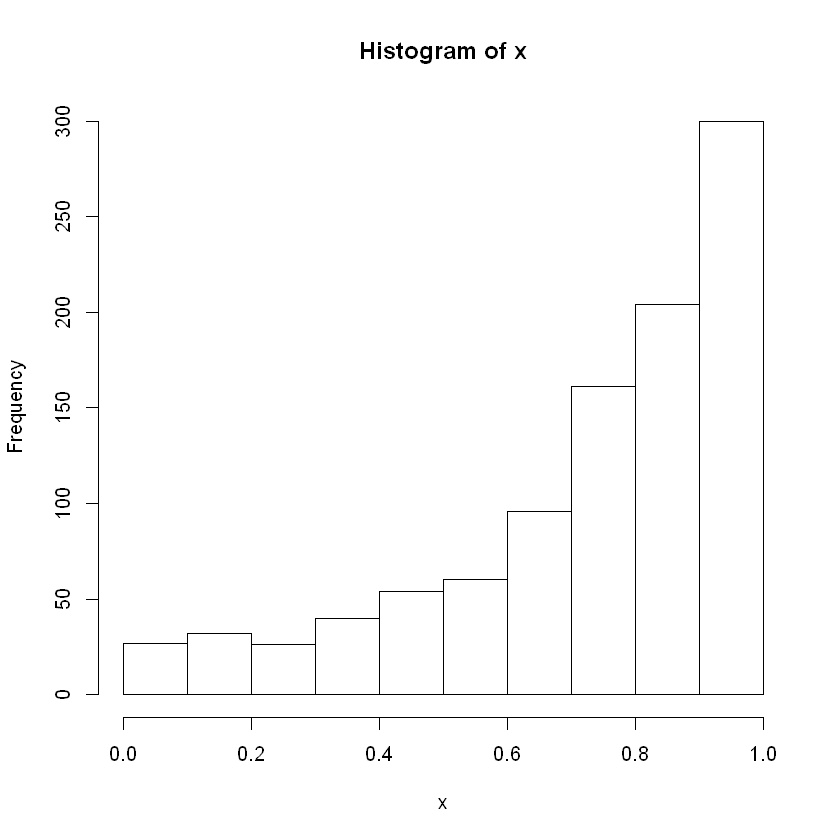

In [27]:
# Metodo: ACPETACION - RECHAZO
# y ~ U(0,1)      g(y)=1 ;   0<y<1
#paso 0 ->  c = max f(x)/g(x); x=1; por lo que c=1/4 +2 + 5/4 = 14/7 =7/2=3
# f(x)/(c*g(x)) = (2/7)*(1/4+2*x^3+(5/4)*x^4)

rm(list=ls())

h_x <- function(x){
    return((2/7)*(1/4+2*x^3+(5/4)*x^4))
}


k<-1000
x<-rep(1,k)
for(i in 1:k){
    y<-runif(1,0,1)
    u<-runif(1,0,1)
    while(u>=h_x(y)){
        y<-runif(1,0,1)
        u<-runif(1,0,1)
    }
    x[i]<-y
}


hist(x)

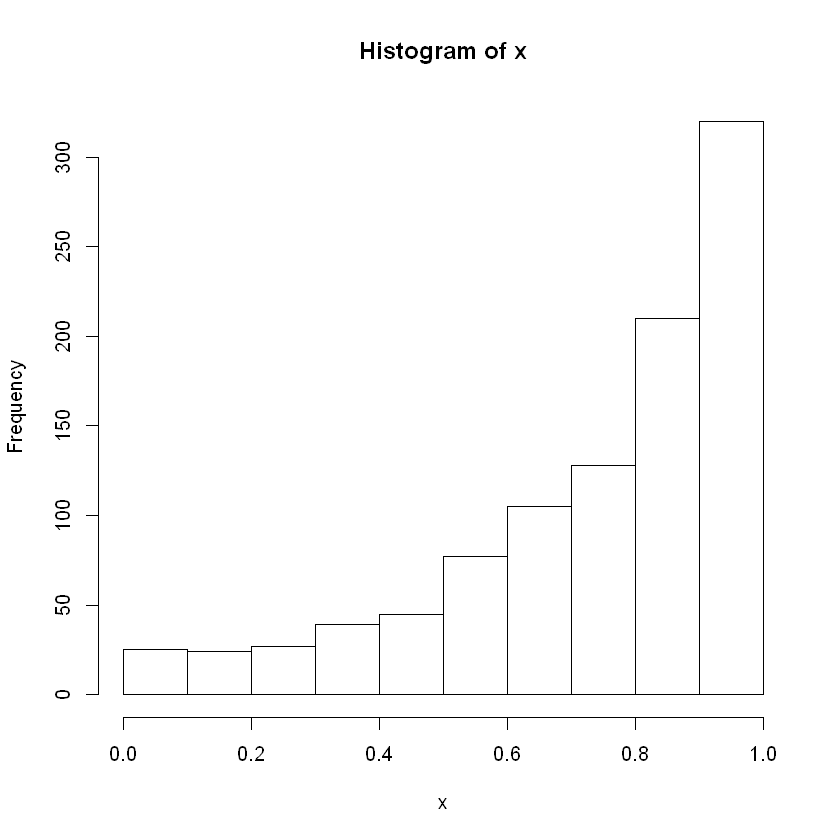

In [29]:
# 2do Metodo: 
# F(x) = alpha1*F_1(x) + alpha2*F_2(x) + alpha3*F_3(x)
# F(x) = x/4 + x^4/2 + x^5/4 = (1/4)*x + (1/2)*(x^4) +(1/4)*(x^5)

rm(list=ls())

k<-1000
x<-rep(1,k)

for(i in 1:k){
    u<-runif(1,0,1)
    if(u<(1/4)){
        x[i]<-runif(1,0,1)
    }else{
        if((1/4)<=u && u<(3/4)){
            x[i]<-runif(1,0,1)^(1/4)
        }else{
            if((3/4)<=u){
                x[i]<-runif(1,0,1)^(1/5)
            }
        }
    }
}

hist(x)

## Problema 02
Utilizar el método de la composición para generar valores de una V.A. X con masa de probabilidad dado por 
$$ p_j=\{0.11 \space j \space impar, 5 \leq j \leq 13 \space \space 0.09 \leq j par, \space 6 \leq j \leq 14 \}$$
#### Sol.

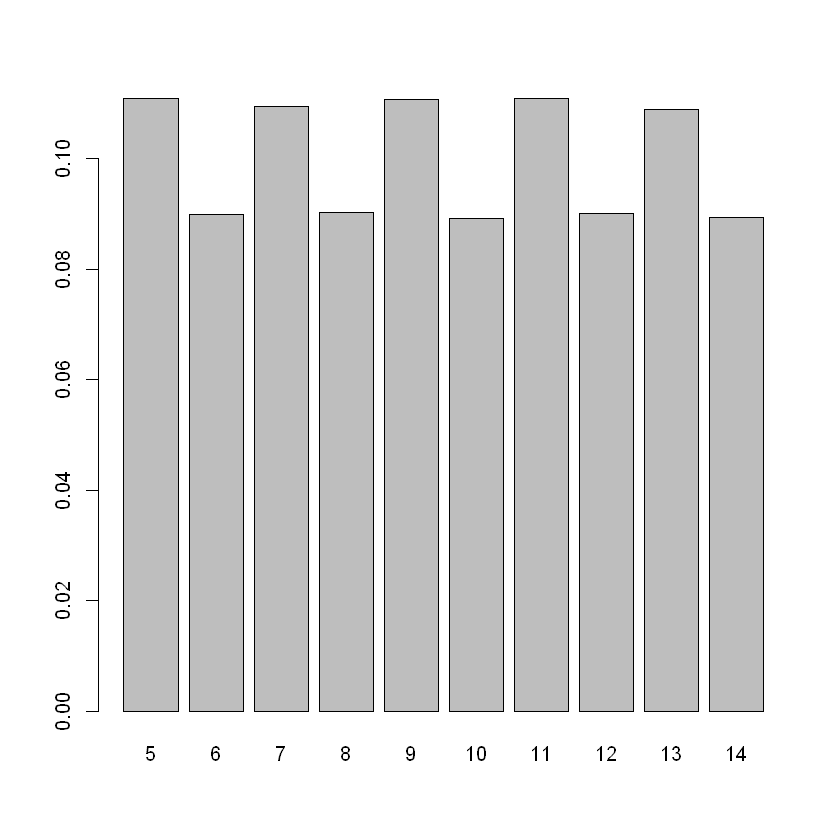

In [44]:
rm(list=ls())
x<-rep(0,100000)
n<-1:length(x)
for(i in 1:length(x)){
    u1<-runif(1,0,1)
    u2<-runif(1,0,1)
    if(u1<11/20){
        x[i]<-2*(floor(5*u2))+5
    }else{
        x[i]<-2*(floor(5*u2))+6
    }
}

y<-table(x)/length(n)
barplot(y)

## Problema 03
Usar el método de Aceptación-Rechazo para hallar una forma eficiente de generar valores de una V.A con función de densidad 
$$ f(x) = \frac{1}{2} (1+x)e^{-x}; \space \space 0<x<\infty $$
#### Sol.


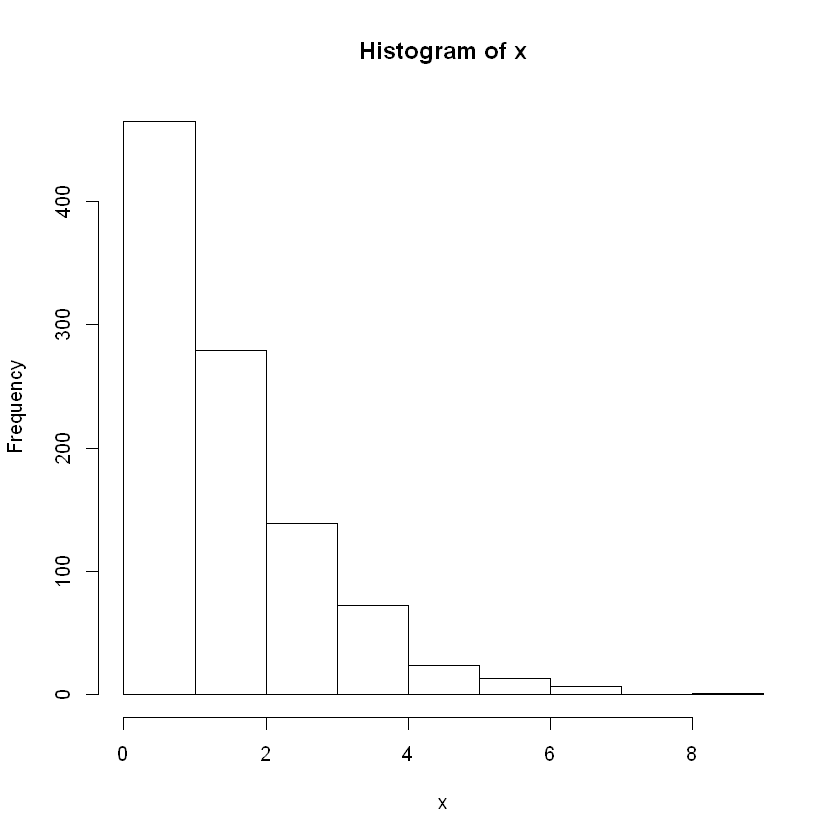

In [61]:
rm(list=ls())
k<-1000
x<-rep(1,k)
lambda<-(sqrt(5)-1)/2
c<-(exp(-lambda))/((2*lambda)*(1-lambda))
for(i in 1:k){
    y <- -(1/lambda)*log(runif(1,0,1))
    u <- runif(1,0,1)
    while(u>=(1/c)*(1/(2*lambda))*(1+y)*exp(-y*(1-lambda))){
        y <- -(1/lambda)*log(runif(1,0,1))
        u <- runif(1,0,1)
    }
    x[i]<-y
}

hist(x)

## Problema 04
Diseñar e implementar un algoritmo que genere valores de una V.A cuya funcion es dado por
$$ F(x) = \frac{1}{2} (x+x^2); \space \space 0 \leq x \leq 1 $$
#### Sol.

- 4.1. Metodo de la Transformada Inversa


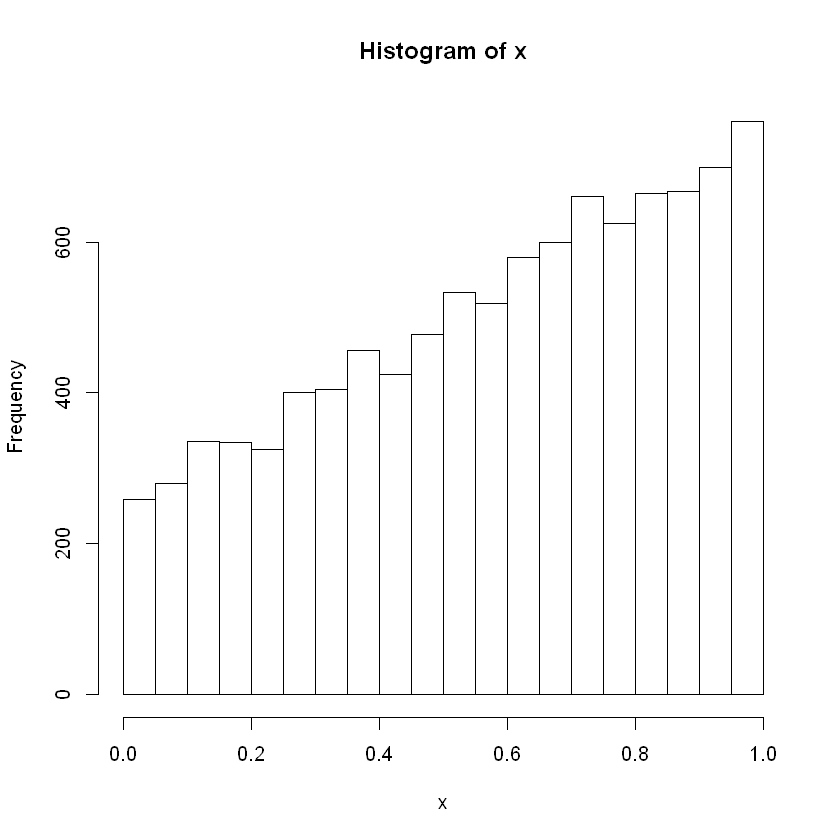

In [80]:
# F(x) = u = (1/2)*(x+x^2)  <--> ((x+1/2)^2)*(1/2) - (1/4)*(1/2) = u
#                           <--> x = (2*(u+1/8))^(1/2) - (1/2)   

rm(list=ls())

k<-10000
x<-rep(1,k)

for(i in 1:k){
    x[i] = (2*(runif(1,0,1) + (1/8)))^(1/2) - (1/2)
}

hist(x)

- 4.2. Metodo A-R

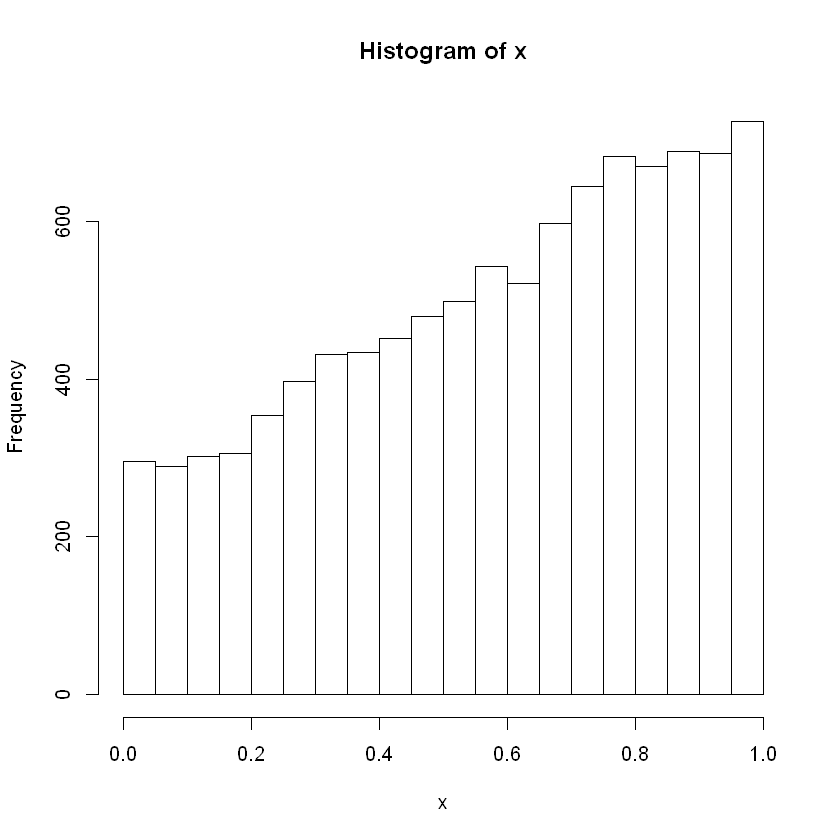

In [83]:
# f(x) = (1/2)+x     ->    y ~ U(0,1)
#Paso 0 -> c = max f(x)/g(x):   c = 3/2


rm(list=ls())

k<-10000
x<-rep(1,k)

for(i in 1:k){
    y<-runif(1,0,1)
    u<-runif(1,0,1)
    while(u>((1/3)+(2/3)*y)){
        y<-runif(1,0,1)
        u<-runif(1,0,1)
    }
    x[i]<-y
}

hist(x)